# **Importing Packages**

In [23]:
!pip install missingno

In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import missingno

#**Load Data**

In [91]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

#**Show Data**

In [92]:
dataset.head(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
5,15.0,8,429.0,198.0,4341.0,10.0,70,1
6,14.0,8,454.0,220.0,4354.0,9.0,70,1
7,14.0,8,440.0,215.0,4312.0,8.5,70,1
8,14.0,8,455.0,225.0,4425.0,10.0,70,1
9,15.0,8,390.0,190.0,3850.0,8.5,70,1


# **Data Cleaning**

## 1) Detecting N/A

In [93]:
dataset.isna()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
393,False,False,False,False,False,False,False,False
394,False,False,False,False,False,False,False,False
395,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False


In [94]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [95]:
dataset.isna().any()

MPG             False
Cylinders       False
Displacement    False
Horsepower       True
Weight          False
Acceleration    False
Model Year      False
Origin          False
dtype: bool

<Axes: >

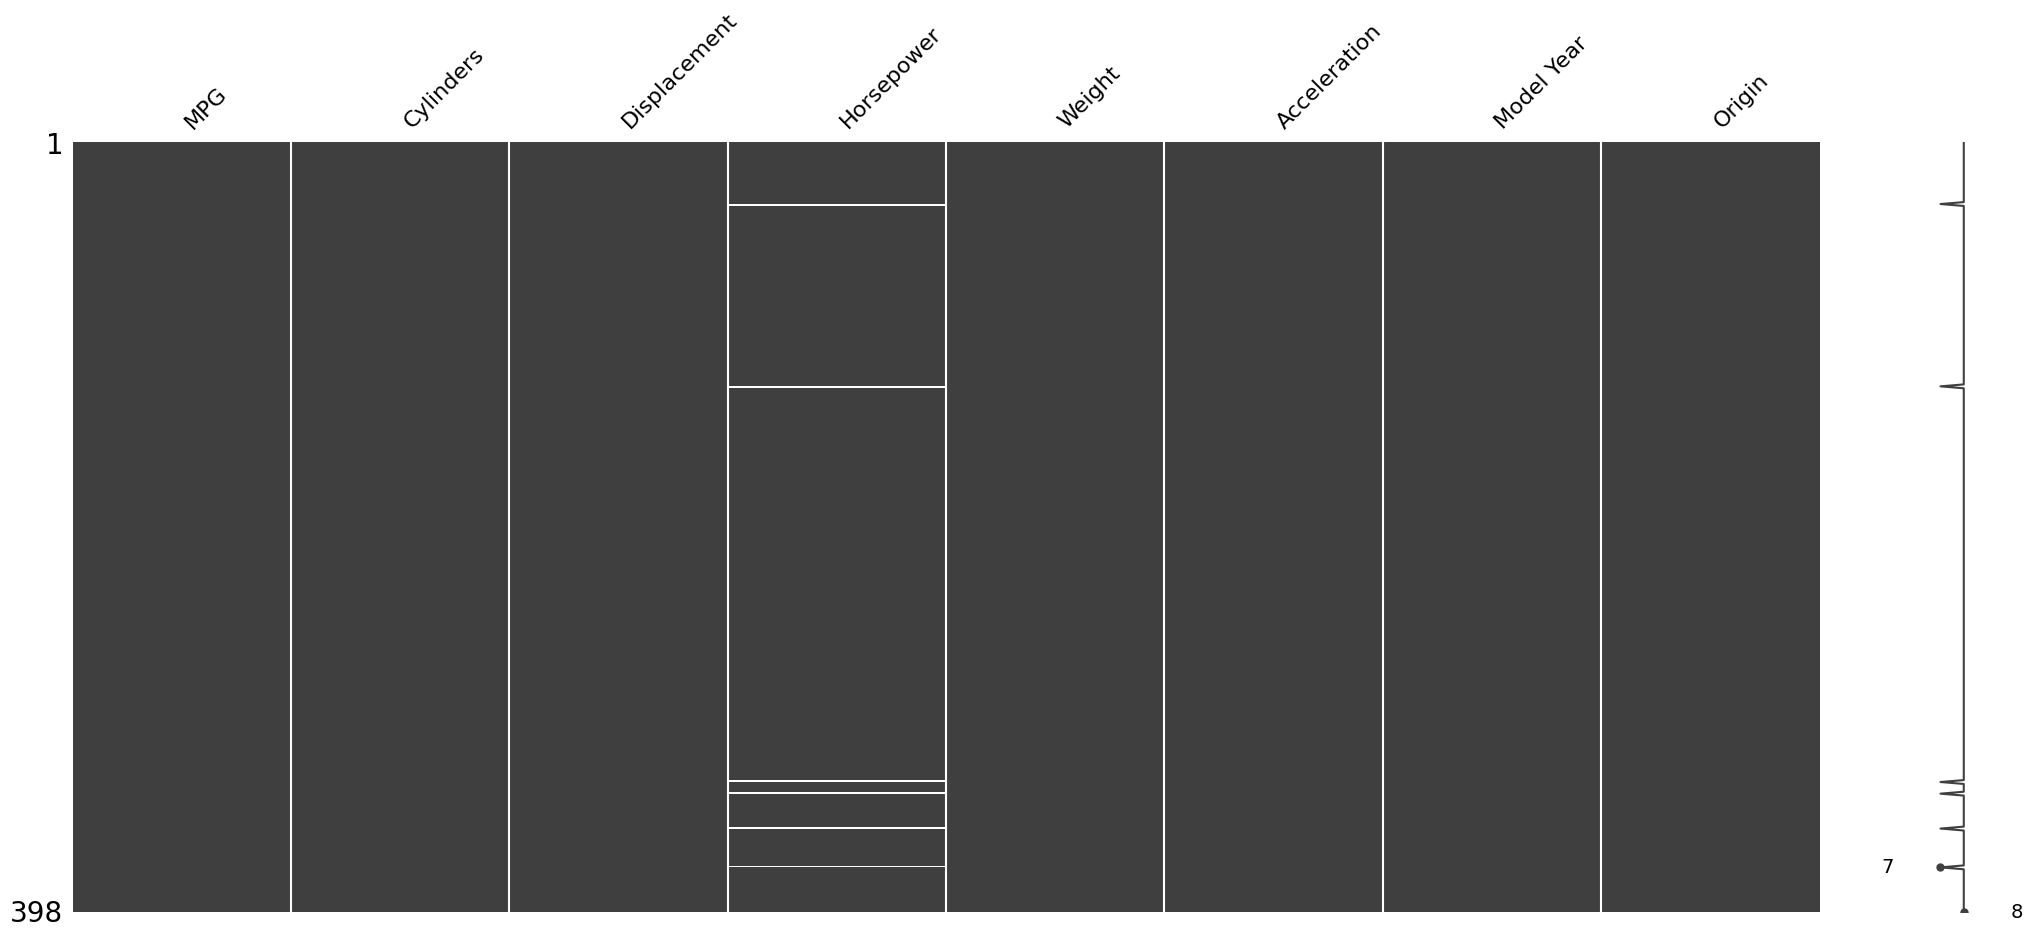

In [96]:
missingno.matrix(dataset)

<Axes: >

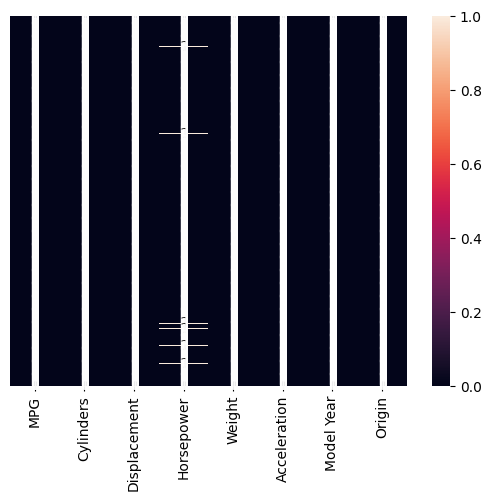

In [97]:
sns.heatmap(dataset.isnull(), yticklabels=False, annot=True)

###2) Remove N/A values

In [98]:
dataset.dropna(how='all')

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [99]:
dataset.dropna(inplace=True)
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

# **Mapping**

In [100]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [101]:
dataset.head(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA
5,15.0,8,429.0,198.0,4341.0,10.0,70,USA
6,14.0,8,454.0,220.0,4354.0,9.0,70,USA
7,14.0,8,440.0,215.0,4312.0,8.5,70,USA
8,14.0,8,455.0,225.0,4425.0,10.0,70,USA
9,15.0,8,390.0,190.0,3850.0,8.5,70,USA


## **One-Hot Encoding**

In [102]:
dataset=pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,False,False,True
1,15.0,8,350.0,165.0,3693.0,11.5,70,False,False,True
2,18.0,8,318.0,150.0,3436.0,11.0,70,False,False,True
3,16.0,8,304.0,150.0,3433.0,12.0,70,False,False,True
4,17.0,8,302.0,140.0,3449.0,10.5,70,False,False,True


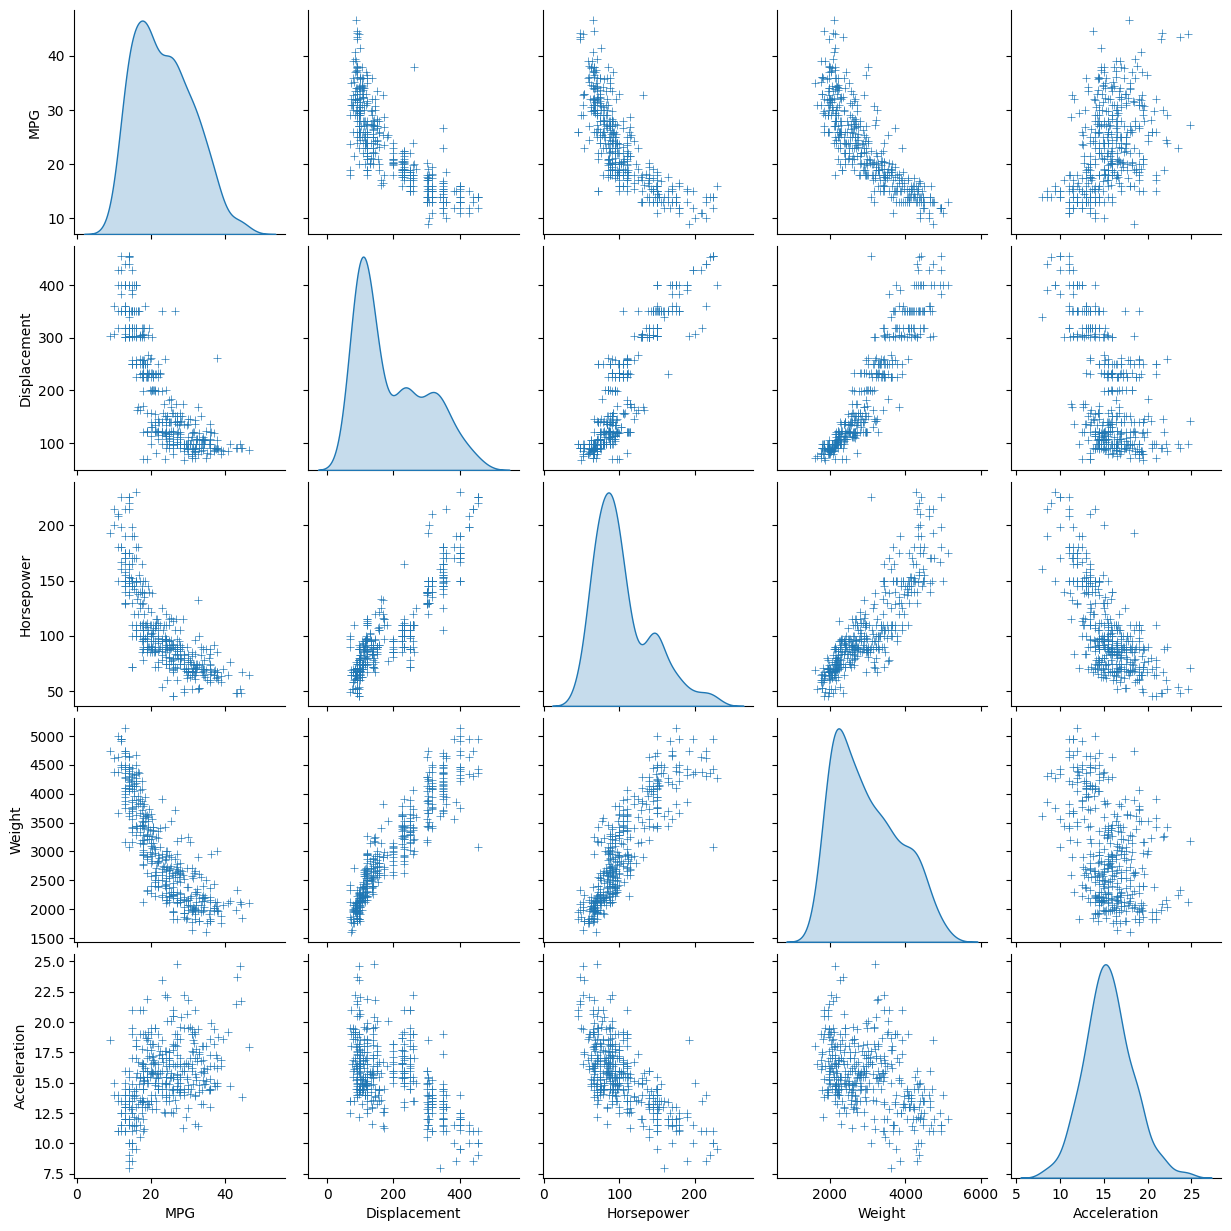

In [103]:
sns.pairplot(dataset[['MPG', 'Displacement', 'Horsepower', 'Weight', 'Acceleration']],
             diag_kind='kde',
             markers='+',
             plot_kws={'alpha': 1})

plt.show()


## **Define Features and prediction sets**

In [104]:
datasetXsingle=dataset[['Horsepower']]
datasetXMulti=dataset[['Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Europe','Japan','USA']]
datasetY=dataset[['MPG']]

In [106]:
print(dataset.columns)

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'Europe', 'Japan', 'USA'],
      dtype='object')


##**Fit single-variable linear regression model**

In [108]:
single_model = LinearRegression()
single_model.fit(datasetXsingle, datasetY)

LinearRegression()

In [112]:
print("Single-variable model coefficients:", single_model.coef_)

Single-variable model coefficients: [[-0.15784473]]


##**Fit multi-variable linear regression model**

In [111]:
multi_model = LinearRegression()
multi_model.fit(datasetXMulti, datasetY)

LinearRegression()

In [113]:
print("Multi-variable model coefficients:", multi_model.coef_)

Multi-variable model coefficients: [[-0.48970942  0.02397864 -0.01818346 -0.00671038  0.07910304  0.77702694
   0.80225883  1.0254847  -1.82774353]]


##**Normalize multi-variable inputs**

In [116]:
#Initialize standard Scalar
scaler = StandardScaler()

In [117]:
# Fit and transform the data
datasetXMulti_normalized = scaler.fit_transform(datasetXMulti)

In [123]:
# Convert the scaled data back to a DataFrame
datasetXMulti_normalized = pd.DataFrame(datasetXMulti_normalized, columns=datasetXMulti.columns)

In [133]:
print("Normalized Data:")
print(datasetXMulti_normalized)

Normalized Data:
     Cylinders  Displacement  Horsepower    Weight  Acceleration  Model Year  \
0     1.483947      1.077290    0.664133  0.620540     -1.285258   -1.625315   
1     1.483947      1.488732    1.574594  0.843334     -1.466724   -1.625315   
2     1.483947      1.182542    1.184397  0.540382     -1.648189   -1.625315   
3     1.483947      1.048584    1.184397  0.536845     -1.285258   -1.625315   
4     1.483947      1.029447    0.924265  0.555706     -1.829655   -1.625315   
..         ...           ...         ...       ...           ...         ...   
387  -0.864014     -0.520637   -0.480448 -0.221125      0.021294    1.636410   
388  -0.864014     -0.932079   -1.364896 -0.999134      3.287676    1.636410   
389  -0.864014     -0.568479   -0.532474 -0.804632     -1.430430    1.636410   
390  -0.864014     -0.712005   -0.662540 -0.415627      1.110088    1.636410   
391  -0.864014     -0.721574   -0.584501 -0.303641      1.400433    1.636410   

       Europe    Japan